<a href="https://colab.research.google.com/github/divypandya/OpenCV-Projects/blob/master/Face_Detection_With_OpenCV_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**There's a hidden face detector in OpenCV lib ;)**





---

**1. Detecting Faces in a Image**


---



In [1]:
# import the necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
# first hardcode arguments to be passed
# ps these are mere path to the data i'll be using, you should change these path, right?
args = {'image' : 'drive/My Drive/Colab Notebooks/CV Tutorials/Face Detector/deep-learning-face-detection/iron_chic.jpg',
        'video' : 'drive/My Drive/2019-06-23-221457.mp4',
       'prototxt' : 'drive/My Drive/Colab Notebooks/CV Tutorials/Face Detector/deep-learning-face-detection/deploy.prototxt.txt',
        'model' : 'drive/My Drive/Colab Notebooks/CV Tutorials/Face Detector/deep-learning-face-detection/res10_300x300_ssd_iter_140000.caffemodel',
        'confidence' : 0.3
       }

print(args)

{'image': 'drive/My Drive/Colab Notebooks/CV Tutorials/Face Detector/deep-learning-face-detection/iron_chic.jpg', 'video': 'drive/My Drive/2019-06-23-221457.mp4', 'prototxt': 'drive/My Drive/Colab Notebooks/CV Tutorials/Face Detector/deep-learning-face-detection/deploy.prototxt.txt', 'model': 'drive/My Drive/Colab Notebooks/CV Tutorials/Face Detector/deep-learning-face-detection/res10_300x300_ssd_iter_140000.caffemodel', 'confidence': 0.3}


In [2]:
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(args['prototxt'], args['model'])

[INFO] loading model...


In [3]:
# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread(args['image'])
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
                            (300, 300), (104.0, 177.0, 123.0)
                            )

# pass the blob through the network and obtain the detections and
# predictions
print('[INFO] computing object detection...')
net.setInput(blob)
detections = net.forward()

[INFO] computing object detection...


**To detect faces, we pass the blob  through the net.
And from there we’ll loop over the detections  and draw boxes around the detected faces:**

In [0]:
# loop over the detections
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
	# prediction
    confidence = detections[0, 0, i, 2]
    
    if confidence > args['confidence']:
        # compute the (x, y)-coordinates of the bounding box for the
		# object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype('int')
        
        # draw the bounding box of the face along with the associated
		# probability
        
        text = '{:.2f}%'.format(confidence*100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),
                     (0, 0, 255), 2
                     )
        cv2.putText(image, text, (startX, y),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 255), 2
                   )
        

(-0.5, 499.5, 499.5, -0.5)

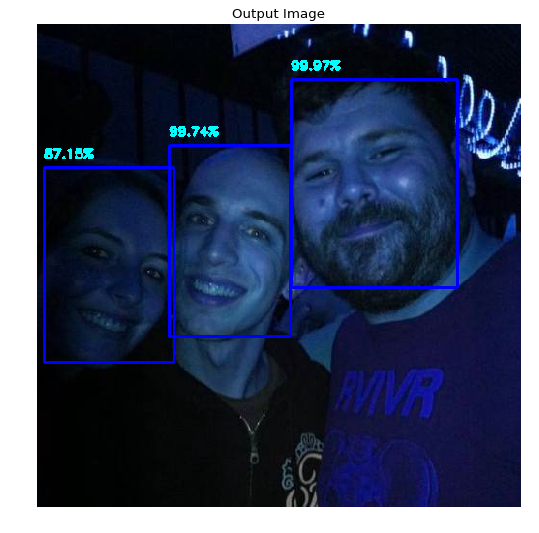

In [5]:
# show the output image
fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w',
                     edgecolor='k')
ax = fig.add_subplot(1,1,1)
plt.imshow(image)
plt.title('Output Image')
plt.axis('off')



---

**Face detection in video and webcam with OpenCV and deep learning**


---



FileVideoStream class

In [0]:
# First off construct a FileVideoStream class to optimize video processing quality 
# using videocapture().
# importing required packages
from threading import Thread
import sys

# import the Queue class from Python 3
if sys.version_info >= (3, 0):
	from queue import Queue
    
# otherwise, import the Queue class for Python 2.7
else:
	from Queue import Queue
    
class FileVideoStream:
    def __init__(self, path, queueSize = 128):
        # initialize the file video stream along with the boolean
		# used to indicate if the thread should be stopped or not
        self.stream = cv2.VideoCapture(path)
        self.stopped = False
        
        # initialize the queue used to store frames read from
		# the video file
        self.Q = Queue(maxsize = queueSize)
        
    def start(self):
        # start a thread to read frames from the file video stream
        t = Thread(target = self.update, args = ())
        t.daemon = True
        t.start()
        return self
    
    def update(self):
        # keep looping infinitely
        while True:
            # if the thread indicator variable is set, stop the
			# thread
            if self.stopped:
                return
            
            # otherwise, ensure the queue has room in it
            if not self.Q.full():
                # read the next frame from the file
                (grabbed, frame) = self.stream.read()
                
                # if the `grabbed` boolean is `False`, then we have
				# reached the end of the video file
                if not grabbed:
                    self.stopped()
                    return
                
                # add the frame to the queue
                self.Q.put(frame)
                
    
    def read(self):
        # return next frame in the queue
        return self.Q.get()
    
    def more(self):
        # return True if there are still frames in the queue
        return self.Q.qsize() > 0
    
    def stop(self):
        # indicate that the thread should be stopped
        self.stopped = True
        

In [0]:
# importing important packages
import numpy as np
import imutils
import time
import cv2
from google.colab.patches import cv2_imshow

In [0]:
# initialize the video stream and allow the camera sensor to warm up
print("[INFO] starting video stream...")
fvs = FileVideoStream(args['video']).start()
time.sleep(2.0)
# loop over the frames from the video stream
writer = None
Video_Stream_Out = 'drive/My Drive/detected1.mp4'
while fvs.more():
    # grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
    frame = fvs.read()
    frame = imutils.resize(frame, width = 400)
    
    # grab the frame dimensions and convert it to a blob
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300),
                                (104.0, 177.0, 123.0)
                                )
    
    # pass the blob through the network and obtain the detections and
	# predictions
    net.setInput(blob)
    detections = net.forward()
    
    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
		# prediction
        confidence = detections[0,0,i,2]
        
        # filter out weak detections by ensuring the `confidence` is
		# greater than the minimum confidence
        
        if confidence < args['confidence']:
            continue
        
        # compute the (x, y)-coordinates of the bounding box for the
		# object
        
        box = detections[0, 0, i, 3:7] * np.array([w,h,w,h])
        (startX, startY, endX, endY) = box.astype('int')
        
        # draw the bounding box of the face along with the associated
		# probability
        
        text = "{:.2f}%".format(confidence*100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(frame, (startX, startY), (endX, endY),
                     (0,0,255),2
                     )
        
        cv2.putText(frame, text, (startX, y),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 255), 2
                   )
        
     # Check if the video writer is None
    if writer is None:
         # Initialize our video writer
        fourcc = cv2.VideoWriter_fourcc(*"XVID")
        writer = cv2.VideoWriter(Video_Stream_Out, fourcc, 30,
        (frame.shape[1], frame.shape[0]), True)
    
    # Write the output frame to disk
    writer.write(frame)

# Release the file pointers
print("[INFO] cleaning up...")
writer.release()
cv2.destroyAllWindows()
fvs.stop()